
<div style="margin-left: 10px">
<h1>Gol Linhas Aéreas Inteligentes - Case 01</h1>
Processo seletivo - Desenvolvedor (E)<br>
<b>Candidato:</b> Maycon Felipe da Silva Mota <br>
<b>Email:</b> mayconfelipemotamw3@gmail.com<br>


---





# Importando bibliotecas que usarei no CASE 01

In [52]:
import pandas as pd 
import numpy as np 
import plotly.graph_objects as go
import seaborn as sns
from pandas import DataFrame
from tabulate import tabulate

# 1 - Faça um ranking para o número total de PAX por dia da semana.

In [53]:
# Leitura do Dataset do Case 01 
df_case01 = pd.read_excel('./input/case_analytics-ds.xlsx', sheet_name='Dados')
df_case01

,Data Venda,Canal de Venda,Local de Venda,PAX,Monetário Vendido,RPK
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039
...,...,...,...,...,...,...
2427,2017-04-01,Porta a Porta,Vast,1079,28486.396741,54551
2428,2017-04-01,Porta a Porta,Ellipsis,841,23600.998318,46988
2429,2017-04-01,TeleVenda,Arena,175,10270.292519,26599
2430,2017-04-01,Telégrafo,Arena,105,5470.410450,15130


In [54]:

# Gerar coluna dia da semana
df_case01['Dia_Semana_Venda']= df_case01['Data Venda'].dt.day_name(locale='pt')

# Agregar pela soma, agrupando pelo dia da semana e criar um ranking do maior ao menor
df_ranking_pax = df_case01.groupby(by= df_case01['Dia_Semana_Venda']).sum()
df_ranking_pax['rank'] = df_ranking_pax['PAX'].rank(ascending=False)
df_ranking_pax = df_ranking_pax.sort_values(by= ['rank'])

# Exibir o DF com PAX, RPK e posição do ranking
df_ranking_pax[['PAX', 'RPK', 'rank']].to_csv('./output/ranking_pax_semanas.csv')

### Como vimos no dataframe acima, quarta-feira e quinta-feira são os dias onde há maior número de PAX.

## 2 - Qual a correlação de sábado e domingo somados com o total de RPK?


In [55]:
# Para verificarmos a correlação de sábado e domingo somados com o valor total de RPK, irei criar um gráfico de barras. 
# Transformatar o dataset anterior e resetar o índice
df_correlacao = df_ranking_pax.reset_index()[['Dia_Semana_Venda', 'PAX', 'RPK']]

# Fazer uma linha somando sábado e domingo
df_correlacao = df_correlacao.append(df_correlacao.loc[(df_correlacao['Dia_Semana_Venda'] == 'Sábado') | (df_correlacao['Dia_Semana_Venda'] == 'Domingo')].sum(), ignore_index=True)
df_correlacao = df_correlacao.drop([3, 4])
df_correlacao['pct_total'] = (df_correlacao['RPK']/df_correlacao['RPK'].sum())*100
df_correlacao.to_csv('./output/relacao_total_rpk.csv')
df_correlacao.sort_values(by= 'pct_total', ascending=False)

,Dia_Semana_Venda,PAX,RPK,pct_total
7,SábadoDomingo,495087,45590272,28.088781
0,Quarta-feira,293025,26263705,16.181423
1,Quinta-feira,258488,23501102,14.479346
2,Sexta-feira,255625,23309936,14.361566
5,Segunda-feira,236316,23275908,14.340601
6,Terça-feira,219802,20366840,12.548285


<AxesSubplot:>

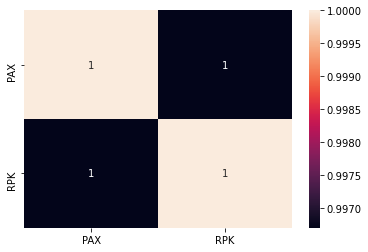

In [56]:

## A questão não apresenta informações concretas para que seja possível criar uma correlação, uma vez que para que seja possível fazer correlações deve-se, ao mínimo, utilizar duas medidas sendo X e Y em uma escala contínua para que seja possível obter o coeficiente de correlação. 

df_correlacao[['PAX', 'RPK']].corr()

sns.heatmap(df_correlacao[['PAX', 'RPK']].corr(), annot=True)


In [57]:
fig = go.Figure(data=[go.Bar(
            x=df_correlacao['Dia_Semana_Venda'], y=df_correlacao['RPK'],
            text=df_correlacao['RPK'],
            textposition='auto',
        )])

fig.show()

# 3 - Qual a média de ‘Monetário’ por mês por Canal? E a mediana?

In [58]:
# Gerando uma coluna de Numero de mês
df_case01['Mes_Ano'] = df_case01['Data Venda'].dt.strftime('%m/%Y')

# Ordenando valores pela data venda 
df_case01 = df_case01.sort_values(by= 'Mes_Ano')

# Agrupando os dados agregando média e mediana por canal de venda e mês
df_media = df_case01.groupby(by= ['Canal de Venda', 'Mes_Ano'])['Monetário Vendido'].agg(['mean', 'median'])

# renomeando o nome das colunas
df_media.columns = ['Média', 'Mediana']
df_media.to_csv('./output/media_monetario_por_mes_canal.csv')
df_media

Média       Mediana
Canal de Venda Mes_Ano                            
Porta a Porta  01/2017  31320.569487  28823.025305
               02/2017  31710.148886  29711.580146
               03/2017  31055.939762  30488.191027
               04/2017  33319.496263  32421.609418
               11/2016  34638.071796  30262.977968
               12/2016  28615.452500  25527.519295
TeleVenda      01/2017  32868.881429  19085.123238
               02/2017  32208.445818  18926.690232
               03/2017  32132.246712  18666.879969
               04/2017  35795.781915  28091.885619
               11/2016  30963.459349  18757.707785
               12/2016  28045.721461  17567.600938
Telégrafo      01/2017   4234.022567   3782.248868
               02/2017   4307.626273   4045.893131
               03/2017   4568.148531   4345.559552
               04/2017   3778.591835   3458.884666
               11/2016   4614.310076   4029.132131
               12/2016   5212.648055   4227.577948

# 4 - Crie um forecast de PAX por ‘Local de Venda’ para os próximos 15 dias a contar da última data de venda. (Aqui a técnica é livre) 

In [59]:
# Para analisar essa série temporal, irei utilizar a biblioteca Prophet que foi desenvolvida pelo Facebook e é utilizada em grande parte das aplicações. 
### https://facebook.github.io/prophet/

from prophet import Prophet


In [60]:
# Transformação do dataset para o formato ds | y, conforme a documentação do Prophet indica 

df_forecast = df_case01[['Data Venda', 'PAX']]
df_forecast.columns = ['ds', 'y']
df_forecast = df_forecast.groupby(by = 'ds').sum()
df_forecast = df_forecast.reset_index()
df_forecast

# Intanciação do modelo, aqui fiz a definição de alguns parametros como o modo da sazonalidade, sazonalidade anual, mensal ou diária. Em seguida, adicionei as sazonalidades mensais e trimestrais, por fim, passei a biblioteca os feriados do Brasil. 

m = Prophet(seasonality_mode='additive', yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False, seasonality_prior_scale=10, changepoint_prior_scale=3, holidays_prior_scale=20)
m.add_seasonality(name='monthly', period=30.5, fourier_order=12)
m.add_seasonality(name='quartely', period=365.25/4, fourier_order=5, prior_scale=15)
m.add_country_holidays(country_name='BR')

# Ajuste do modelo para treinamento

m.fit(df_forecast)


In [61]:
# Prever os próximos 15 dias e incluir o histórico

future = m.make_future_dataframe(periods=15, freq='D', include_history=True)
forecast = m.predict(future)


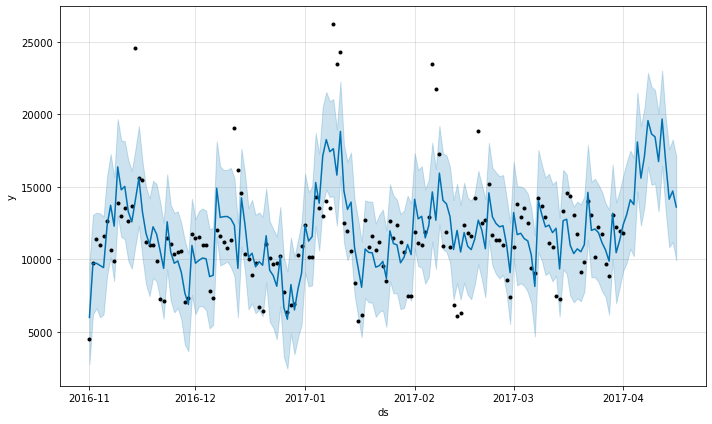

In [62]:
# Previsto x Realizado

fig1 = m.plot(forecast)


In [63]:
# Ajustes do Modelo com o Forecast e o realizado para comparação

df_final = pd.concat([df_forecast, forecast], axis=1)
df_final = df_final[['ds', 'y', 'yhat']]
df_final['diff'] = df_final['yhat'] - df_final['y']
df_final.to_csv('./output/forecast_general_15days.csv')

In [64]:
#### Criando forecast para cada um dos canais de vendas

### Arena 

## Tratamento para o Dataset Arena
df_forecast_arena = df_case01[df_case01['Local de Venda'] == 'Arena']
df_forecast = df_forecast_arena[['Data Venda', 'PAX']]
df_forecast.columns = ['ds', 'y']
df_forecast = df_forecast.groupby(by = 'ds').sum()
df_forecast = df_forecast.reset_index()
df_forecast

## Instanciação do modelo Prophet para o Canal de Venda Arena
m = Prophet(seasonality_mode='additive', yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False, seasonality_prior_scale=10, changepoint_prior_scale=3, holidays_prior_scale=20)
m.add_seasonality(name='monthly', period=30.5, fourier_order=12)
m.add_seasonality(name='quartely', period=365.25/4, fourier_order=5, prior_scale=15)
m.add_country_holidays(country_name='BR')
m.fit(df_forecast)

## Predição para os próximos 15 dias 
future = m.make_future_dataframe(periods=15, freq='D', include_history=True)
forecast = m.predict(future)

## Ajustes para o dataset final 
df_final = pd.concat([df_forecast, forecast], axis=1)
df_final['Local_Venda'] = 'Arena'
df_final = df_final[['ds', 'y', 'yhat', 'Local_Venda']]
df_final['diff'] = df_final['yhat'] - df_final['y']
df_final.to_csv('./output/forecast_arena_15days.csv')

In [65]:
### Arena 

## Tratamento para o Dataset Arena
df_forecast_arena = df_case01[df_case01['Local de Venda'] == 'Mindscape']
df_forecast = df_forecast_arena[['Data Venda', 'PAX']]
df_forecast.columns = ['ds', 'y']
df_forecast = df_forecast.groupby(by = 'ds').sum()
df_forecast = df_forecast.reset_index()
df_forecast

## Instanciação do modelo Prophet para o Canal de Venda Arena
m = Prophet(seasonality_mode='additive', yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False, seasonality_prior_scale=10, changepoint_prior_scale=3, holidays_prior_scale=20)
m.add_seasonality(name='monthly', period=30.5, fourier_order=12)
m.add_seasonality(name='quartely', period=365.25/4, fourier_order=5, prior_scale=15)
m.add_country_holidays(country_name='BR')
m.fit(df_forecast)

## Predição para os próximos 15 dias 
future = m.make_future_dataframe(periods=15, freq='D', include_history=True)
forecast = m.predict(future)
df_final = pd.concat([df_forecast, forecast], axis=1)

## Ajustes para o modelo final
df_final['Local_Venda'] = 'Mindscape'
df_final = df_final[['ds', 'y', 'yhat', 'Local_Venda']]
df_final['diff'] = df_final['yhat'] - df_final['y']
df_final.to_csv('./output/forecast_mindscape_15days.csv')

In [66]:
### Arena 

## Tratamento para o Dataset Arena
df_forecast_arena = df_case01[df_case01['Local de Venda'] == 'Vast']
df_forecast = df_forecast_arena[['Data Venda', 'PAX']]
df_forecast.columns = ['ds', 'y']
df_forecast = df_forecast.groupby(by = 'ds').sum()
df_forecast = df_forecast.reset_index()
df_forecast

## Instanciação do modelo Prophet para o Canal de Venda Arena
m = Prophet(seasonality_mode='additive', yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False, seasonality_prior_scale=10, changepoint_prior_scale=3, holidays_prior_scale=20)
m.add_seasonality(name='monthly', period=30.5, fourier_order=12)
m.add_seasonality(name='quartely', period=365.25/4, fourier_order=5, prior_scale=15)
m.add_country_holidays(country_name='BR')
m.fit(df_forecast)

## Predição para os próximos 15 dias 
future = m.make_future_dataframe(periods=15, freq='D', include_history=True)
forecast = m.predict(future)
df_final = pd.concat([df_forecast, forecast], axis=1)

## Ajustes para o modelo final
df_final['Local_Venda'] = 'Vast'
df_final = df_final[['ds', 'y', 'yhat', 'Local_Venda']]
df_final['diff'] = df_final['yhat'] - df_final['y']
df_final.to_csv('./output/forecast_vast_15days.csv')

In [67]:
### Arena 

## Tratamento para o Dataset Arena
df_forecast_arena = df_case01[df_case01['Local de Venda'] == 'Ellipsis']
df_forecast = df_forecast_arena[['Data Venda', 'PAX']]
df_forecast.columns = ['ds', 'y']
df_forecast = df_forecast.groupby(by = 'ds').sum()
df_forecast = df_forecast.reset_index()
df_forecast

## Instanciação do modelo Prophet para o Canal de Venda Arena
m = Prophet(seasonality_mode='additive', yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False, seasonality_prior_scale=10, changepoint_prior_scale=3, holidays_prior_scale=20)
m.add_seasonality(name='monthly', period=30.5, fourier_order=12)
m.add_seasonality(name='quartely', period=365.25/4, fourier_order=5, prior_scale=15)
m.add_country_holidays(country_name='BR')
m.fit(df_forecast)

## Predição para os próximos 15 dias 
future = m.make_future_dataframe(periods=15, freq='D', include_history=True)
forecast = m.predict(future)
df_final = pd.concat([df_forecast, forecast], axis=1)

## Ajustes para o modelo final
df_final['Local_Venda'] = 'Ellipsis'
df_final = df_final[['ds', 'y', 'yhat', 'Local_Venda']]
df_final['diff'] = df_final['yhat'] - df_final['y']
df_final.to_csv('./output/forecast_ellipsis_15days.csv')


# 6 - Criar modelo relacionando o comporatamento de venda com variaveis não apresentada nos dados (Ex : PIB, Dolar, e etc)

In [68]:
cotacao_dolar = pd.read_csv('./input/USD_BRL Dados Históricos.csv') ## Leitura do Dataset de Dados Históricos sobre o dólar. Fonte: https://br.investing.com/
cotacao_dolar['Data'] = cotacao_dolar['Data'].str.replace('.', '/') ## Transformação para parsear o campo de data
cotacao_dolar['Data'] = pd.to_datetime(cotacao_dolar['Data']) ## Parsear o campo data 
cotacao_dolar['Último'] = pd.to_numeric(cotacao_dolar['Último'].str.replace(',','.')) ## Parsear o campo Ultimo e trocar , por .
cotacao_dolar['Máxima'] = pd.to_numeric(cotacao_dolar['Máxima'].str.replace(',','.')) ## Parsear o campo Máxima  e trocar , por .
cotacao_dolar['Var%'] = cotacao_dolar['Var%'].str.replace('\%|\%', '', regex=True) ## Remover a porcentagem da variação
cotacao_dolar['Var%'] = pd.to_numeric(cotacao_dolar['Var%'].str.replace(',', '.')) ## Parsear o campo Variação e remover %
cotacao_dolar['Mínima'] = pd.to_numeric(cotacao_dolar['Mínima'].str.replace(',','.')) ## Parsear o campo Mínima
cotacao_dolar

,Data,Último,Abertura,Máxima,Mínima,Var%
0,2017-04-25,3.1471,"3,1283",3.1712,3.1275,0.61
1,2017-04-24,3.1280,"3,1506",3.1506,3.1182,-0.64
2,2017-04-21,3.1482,"3,1479",3.1488,3.1479,-0.01
3,2017-04-20,3.1486,"3,1507",3.1705,3.1324,-0.11
4,2017-04-19,3.1522,"3,1075",3.1545,3.1075,1.42
...,...,...,...,...,...,...
121,2016-07-11,3.2020,"3,2348",3.2366,3.1885,-0.98
122,2016-04-11,3.2337,"3,2423",3.2649,3.2169,-0.27
123,2016-03-11,3.2425,"3,2358",3.2565,3.2210,0.20
124,2016-02-11,3.2359,"3,2370",3.2425,3.2355,-0.02


In [69]:
df_case01 = pd.read_excel('./input/case_analytics-ds.xlsx', sheet_name='Dados') ## Realizar novamente a leitura do Dados disponibilizados pelo dataset do Case
df_case01.columns = ['Data', 'Canal de Venda', 'Local de Venda', 'PAX', 'Monetário', 'RPK'] ## Imprimir o dataframe 
df_correlacao_dolar = pd.concat([df_case01, cotacao_dolar], join='inner', axis=1) ## Realizar a união dos datasets do Case e da cotação do dólar através do campo data 
df_correlacao_dolar

,Data,Canal de Venda,Local de Venda,PAX,Monetário,RPK,Data,Último,Abertura,Máxima,Mínima,Var%
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,2017-04-25,3.1471,"3,1283",3.1712,3.1275,0.61
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,2017-04-24,3.1280,"3,1506",3.1506,3.1182,-0.64
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,2017-04-21,3.1482,"3,1479",3.1488,3.1479,-0.01
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,2017-04-20,3.1486,"3,1507",3.1705,3.1324,-0.11
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,2017-04-19,3.1522,"3,1075",3.1545,3.1075,1.42
...,...,...,...,...,...,...,...,...,...,...,...,...
121,2016-11-08,Porta a Porta,Mindscape,1118,31953.297811,113157,2016-07-11,3.2020,"3,2348",3.2366,3.1885,-0.98
122,2016-11-08,TeleVenda,Mindscape,45,2433.649660,5716,2016-04-11,3.2337,"3,2423",3.2649,3.2169,-0.27
123,2016-11-08,TeleVenda,Ellipsis,935,18316.166113,50592,2016-03-11,3.2425,"3,2358",3.2565,3.2210,0.20
124,2016-11-08,TeleVenda,Vast,108,6365.224509,4713,2016-02-11,3.2359,"3,2370",3.2425,3.2355,-0.02


In [71]:
df_correlacao_dolar.corr()

,PAX,Monetário,RPK,Último,Máxima,Mínima,Var%
PAX,1.000000,0.886475,0.808995,0.042631,0.059908,0.074611,-0.183203
Monetário,0.886475,1.000000,0.953686,-0.025684,-0.016907,0.009230,-0.201514
RPK,0.808995,0.953686,1.000000,0.025457,0.037242,0.058532,-0.189349
Último,0.042631,-0.025684,0.025457,1.000000,0.987637,0.980871,0.140041
Máxima,0.059908,-0.016907,0.037242,0.987637,1.000000,0.981353,0.043536
Mínima,0.074611,0.009230,0.058532,0.980871,0.981353,1.000000,-0.030480
Var%,-0.183203,-0.201514,-0.189349,0.140041,0.043536,-0.030480,1.000000


<AxesSubplot:>

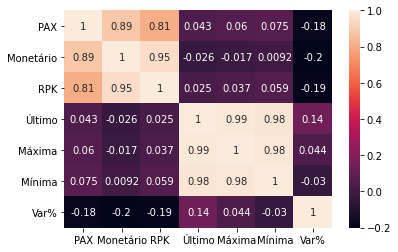

In [70]:
sns.heatmap(df_correlacao_dolar.corr(), annot=True)